In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

**Задание**

- Выбор датасетов:
    - Студенты с **четным** порядковым номером в группе должны использовать набор данных о [жилье в Калифорнии](https://developers.google.com/machine-learning/crash-course/california-housing-data-description?hl=ru) Скачать [тут](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv)
    - Студенты с **нечетным** порядковым номером в группе должны использовать [про обучение студентов](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)
- Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).
- Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.
- Разделите данные на обучающий и тестовый наборы данных.
- Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.
- Постройте **три модели** с различными наборами признаков.
- Для каждой модели проведите оценку производительности, используя метрику коэффициент детерминации, чтобы измерить, насколько хорошо модель соответствует данным.
- Сравните результаты трех моделей и сделайте выводы о том, какие признаки работают лучше всего для каждой модели.
- Бонусное задание
    - Ввести синтетический признак при построении модели

### download dataset

In [81]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /Users/kseniaignateva/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1


In [82]:
file_name = 'Student_Performance.csv'
df = pd.read_csv(f'{path}/{file_name}')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


get information about a df: the index dtype and columns, non-null values and memory usage

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


find and sum null values in dataset 

In [84]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

duplicate rows: find and drop 

In [85]:
df[df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 915 to 9985
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     127 non-null    int64  
 1   Previous Scores                   127 non-null    int64  
 2   Extracurricular Activities        127 non-null    object 
 3   Sleep Hours                       127 non-null    int64  
 4   Sample Question Papers Practiced  127 non-null    int64  
 5   Performance Index                 127 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 6.9+ KB


In [86]:
df = df.drop_duplicates()

dataset statistic 

In [87]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [88]:
# std for each column 
std_col, n_col = [], []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        std = np.std(df[col], ddof=0)
        std_col.append(std)
        n_col.append(col)
for j in range(len(n_col)):
    print(f"{n_col[j]} : {std_col[j]}.")

Hours Studied : 2.5889500163521793.
Previous Scores : 17.324723806723895.
Sleep Hours : 1.6975968845510212.
Sample Question Papers Practiced : 2.8670572065991387.
Performance Index : 19.207597247138363.


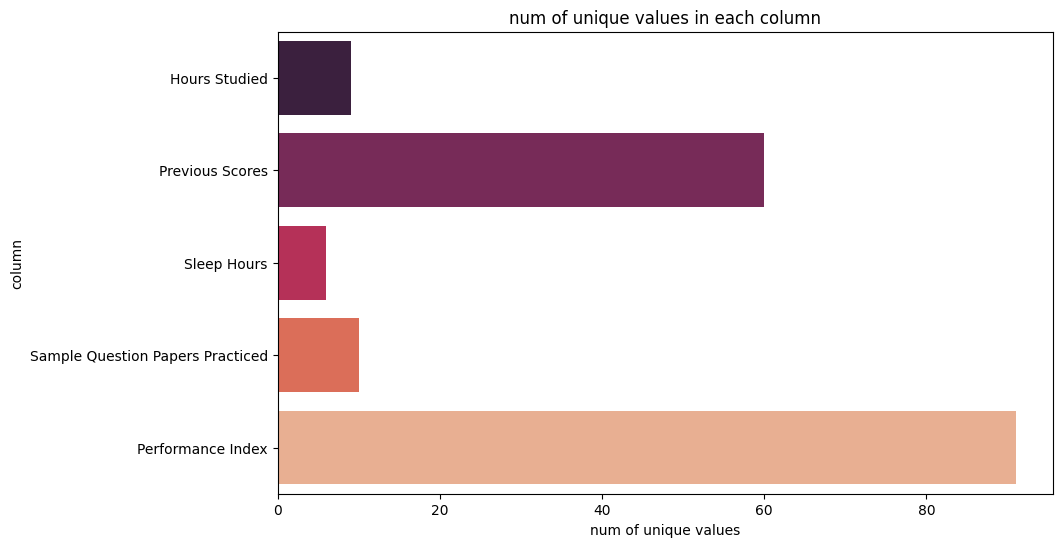

In [89]:
# num of unique values 
unique, columns = [], []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        col_unique = len(df[col].unique())
        unique.append(col_unique)
        columns.append(col)
        
unique_values_df = pd.DataFrame({
    'columns': columns,
    'unique values': unique
})

plt.figure(figsize=(10, 6))
sns.barplot(x=unique, y=columns, data=unique_values_df, palette='rocket')
plt.title('num of unique values in each column')
plt.xlabel('num of unique values')
plt.ylabel('column')
plt.show()
        

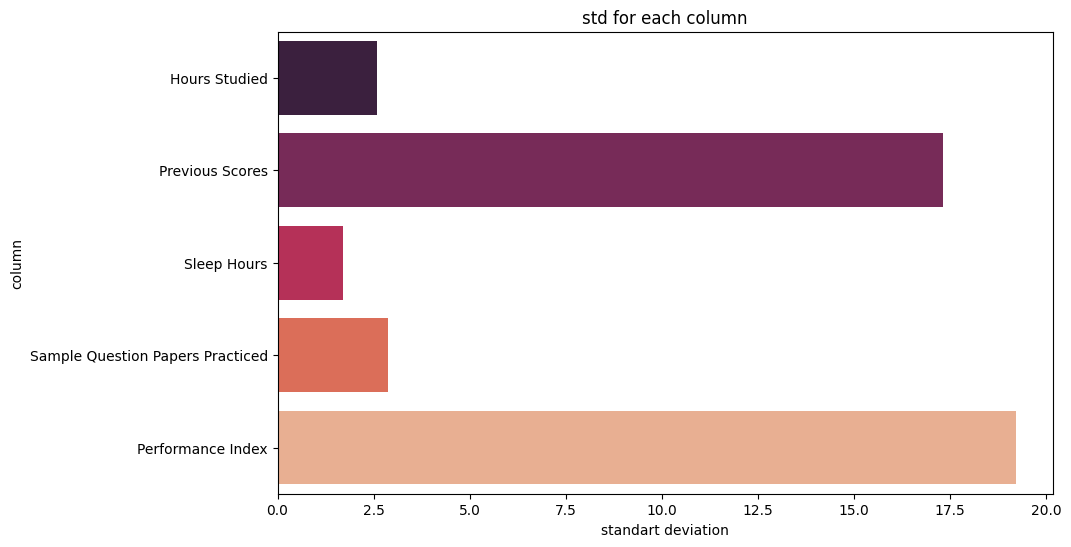

In [90]:
# std visualisation
std_df = pd.DataFrame({'column': n_col, 'std_deviation': std_col})
plt.figure(figsize=(10, 6))
sns.barplot(data=std_df, x=std_col, y=n_col, palette='rocket')
plt.title('std for each column')
plt.xlabel('standart deviation')
plt.ylabel('column')
plt.show()

In [91]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print(f'num_rows: {num_rows}\nnum_columns: {num_cols}')

num_rows: 9873
num_columns: 6


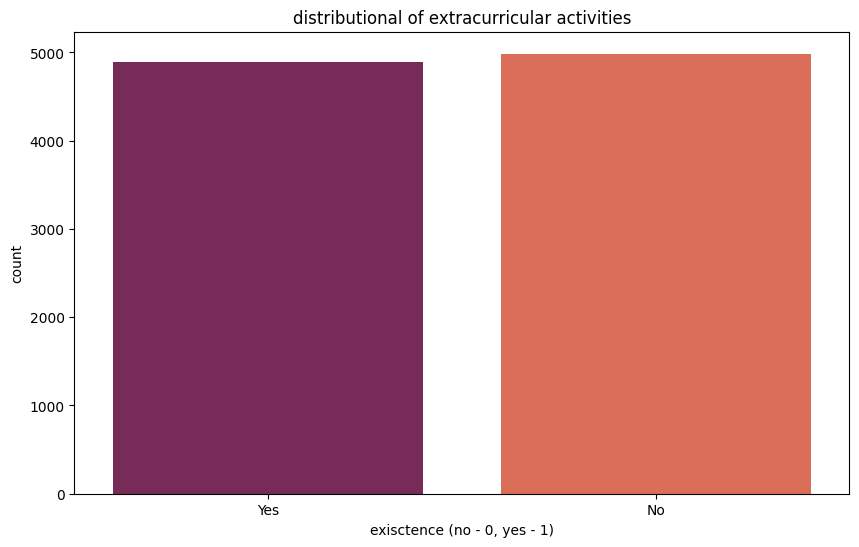

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Extracurricular Activities', palette='rocket')
plt.title('distributional of extracurricular activities')
plt.xlabel('exisctence (no - 0, yes - 1)')
plt.ylabel('count')
plt.show()

### data processing 

In [292]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
df['study_sleep_ratio'] = df['Hours Studied'] / (df['Sleep Hours'] + 1e-5)
df.astype('float64')
print(df.dtypes)

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
study_sleep_ratio                   float64
dtype: object


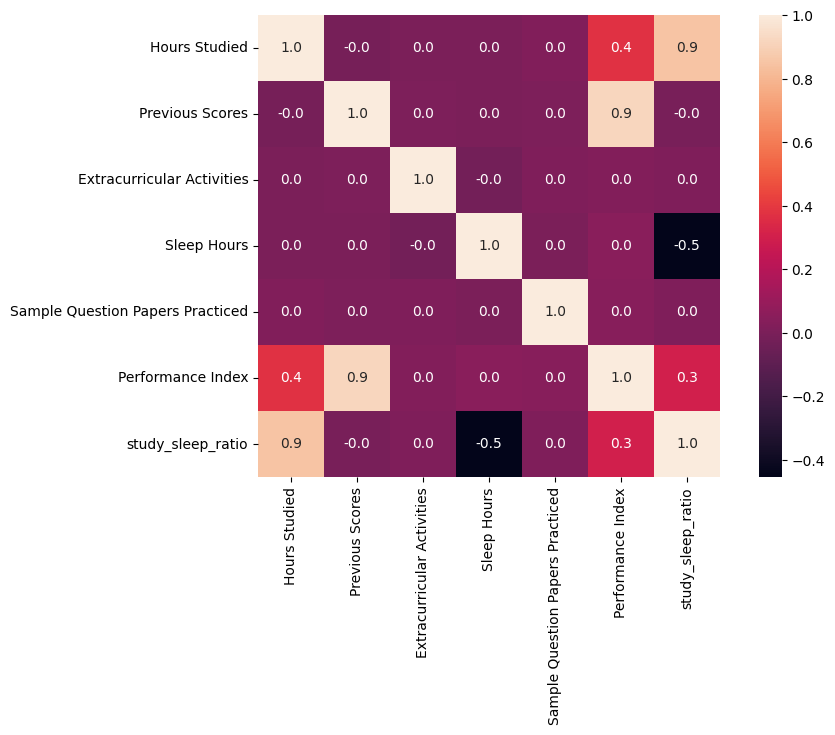

In [294]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".1f", square=True, cbar=True, 
            xticklabels=df.columns, yticklabels=df.columns)
plt.title('')
plt.show()

In [293]:
categorical_features = ['Extracurricular Activities']
numerical_features = df.columns.difference(categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('category', OneHotEncoder(), categorical_features)
    ]
)
# maybe i have to use standart scaler
df_processed = preprocessor.fit_transform(df)
df_processed


array([[0.75      , 0.9       , 1.        , ..., 0.31168877, 0.        ,
        1.        ],
       [0.375     , 0.61111111, 0.71186441, ..., 0.41558437, 1.        ,
        0.        ],
       [0.875     , 0.38888889, 0.18644068, ..., 0.4823753 , 0.        ,
        1.        ],
       ...,
       [0.625     , 0.71111111, 0.72881356, ..., 0.29870169, 0.        ,
        1.        ],
       [1.        , 0.94444444, 0.96610169, ..., 0.54916573, 0.        ,
        1.        ],
       [0.75      , 0.6       , 0.57627119, ..., 0.35714332, 1.        ,
        0.        ]])

In [299]:
X = np.delete(df_processed, 6, axis=1)
y = df_processed[:, 5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

print(f'X_train size: {X_train.shape}')
print(f'X_test size: {X_test.shape}')


X_train size: (8000, 7)
X_test size: (2000, 7)


In [300]:
print(X_train.shape)
print(y_train.shape)


(8000, 7)
(8000,)


### linear regression model

In [301]:
class MyLinearRegression: 
    def __init__(self, epochs, learning_rate):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = None
        self.losses = []
        self.bias = 0
    
    def fit(self, X_train, y_train):
        
        n_samples, n_features = X_train.shape
        
        self.weights = np.zeros(n_features)
        self.X = X_train
        self.y = y_train
        
        for epoch in range(self.epochs):
            y_pred = self.predict(self.X)
            
            loss = np.mean((self.y - y_pred) ** 2)
            self.losses.append(loss)
            
            dw = (1 / n_samples) * (self.X.T @ (y_pred - self.y))
            db = (1 / n_samples) * np.sum(y_pred - self.y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return X @ self.weights + self.bias
    
    def print_info(self):
        print(f'weights: {self.weights}')
        print(f'bias: {self.bias}')
        print(f'losses: {self.losses[0]}, {self.losses[50]}, {self.losses[99]}')
        
            

In [302]:
model = MyLinearRegression(epochs=100, learning_rate=0.01)
model.fit(X_train, y_train)
model.print_info()

weights: [0.10973351 0.06460488 0.04963444 0.05425034 0.01999214 0.08580874
 0.04839231]
bias: 0.11288485391786791
losses: 0.1667358399395403, 0.049249742031937195, 0.03646816565034418


In [303]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2_model = r2_score(y_test, y_pred)
print(f'y_pred: {y_pred}')
print(f'r2_model: {r2_model:.4f}')

y_pred: [0.3305917  0.23529943 0.36352038 ... 0.26785394 0.19886188 0.29448004]
r2_model: 0.3468


In [304]:
def evaluate_model(X_train, y_train, X_test, y_test):
        
    model = MyLinearRegression(epochs=100, learning_rate=0.01)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))    
    return r2

In [305]:
# df['Synthetic Feature'] = df[numerical_features].sum(axis=1) + np.random.rand(df.shape[0])
feature_sets_train = [X_train[:, 0:3], X_train[:, 3:6], X_train[:, 4:7]]
feature_sets_test = [X_test[:, 0:3], X_test[:, 3:6], X_test[:, 4:7]]

r2_model_1 = evaluate_model(feature_sets_train[0], y_train, feature_sets_test[0], y_test)
r2_model_2 = evaluate_model(feature_sets_train[1], y_train, feature_sets_test[1], y_test)
r2_model_3 = evaluate_model(feature_sets_train[2], y_train, feature_sets_test[2], y_test)

In [306]:
print(f'r2 model1: {r2_model_1:4f}')
print(f'r2 model2: {r2_model_2:4f}')
print(f'r2 model3: {r2_model_3:4f}')

r2 model1: 0.255710
r2 model2: 0.058037
r2 model3: 0.036096
